# 2.1 Solution:

In [36]:
import numpy as np 
import math

def wishartM(n,k):
    x = np.random.normal(loc=0, scale=math.sqrt(1/n), size=(n,k))
    xT = x.transpose()
    M = np.matmul(xT,x)
    
    return np.array(M)

In [37]:
M = wishartM(10,5)
M

array([[ 1.00909551,  0.15866088, -0.31114138, -0.03264926,  0.04416556],
       [ 0.15866088,  1.2720535 , -0.14970285, -0.55369773, -0.1087494 ],
       [-0.31114138, -0.14970285,  0.55537143, -0.03414374, -0.17078931],
       [-0.03264926, -0.55369773, -0.03414374,  1.42438512, -0.03166689],
       [ 0.04416556, -0.1087494 , -0.17078931, -0.03166689,  0.48843378]])

# 2.2 Solution:

In [38]:
# Power Iteration to Find Largest Eigen Value and Eigen Vector
import numpy as np
import sys


def power_iteration(M, itr, thr):
    A = M
    k = len(M)
    x = np.zeros((k)).reshape(k,1) #kx1

    #initialize x0 as norm 1 vector
    for i in range(k):
        x[i] = 1/math.sqrt(k) #kx1

    # Reading tolerable error
    tolerable_error = thr

    # Reading maximum number of steps
    max_iteration = itr 
    
    # Power Method Implementation
    condition =  True
    step = 1
    while condition:
        
        # Multiplying A (kxk) and x(kx1)
        w = np.matmul(A,x) #kx1
        
        #Eigen Vector
        xk = w/ np.linalg.norm(w)
    
        # Finding new Eigen value
        
        lambda_k = np.matmul(np.matmul(xk.transpose(),M),xk)    
            
    # Checking 1 iteration
        step = step + 1
        if step > max_iteration:
            break 
            
    # Calculating error
        error = np.linalg.norm(xk - x) 
        x = xk
        condition = error > tolerable_error 
        
    return (lambda_k, xk)

In [39]:
lambda1, eigVect1 = power_iteration(M, 100, 0.000000001)

In [40]:
lambda1

array([[1.93679324]])

In [41]:
eigVect1

array([[ 0.16836775],
       [ 0.66481282],
       [-0.08984671],
       [-0.72198692],
       [-0.0184029 ]])

### 2.2 & 2.4 Solution verification (for reference only):

In [42]:
np.linalg.eig(M)

(array([1.93679324, 1.20350165, 0.25966969, 0.55393368, 0.79544106]),
 array([[ 0.16836774,  0.8005363 ,  0.22008046, -0.47399164,  0.24018837],
        [ 0.66481282,  0.11071731,  0.21699186,  0.17754708, -0.68348896],
        [-0.0898467 , -0.46158092,  0.71231683, -0.51629127, -0.07013324],
        [-0.72198692,  0.34282173,  0.14686826,  0.099777  , -0.57417977],
        [-0.0184029 ,  0.12766996,  0.61279162,  0.68359113,  0.37490174]]))

#### In the above eigen vector matrix, each column represents the eigen vector of the corresponding eigen value.

# 2.4 Solution:

In [43]:
def diagonalize(M,itr,thr):
    lambda_k, xk = power_iteration(M, itr, thr)
    eigen_vals = []
    eigen_vex = []
    eigen_vals.append(lambda_k.tolist()[0][0])
    eigen_vex.append(xk)
    Mold = M
    for i in range(len(M)-1):
        M_new = Mold - lambda_k*(np.matmul(xk,xk.transpose()))
        Mold = M_new
        lambda_k, xk = power_iteration(M_new, itr, thr)
        eigen_vals.append(lambda_k.tolist()[0][0])
        eigen_vex.append(xk)
       
    return [eigen_vals, np.array(eigen_vex).reshape(len(M), len(M))]

In [44]:
d = diagonalize(M,100,0.000000001)


In [45]:
print("The ordered eigen values are as follows:")
print(d[0])
print("\n")
print("The corresponding eigen vectors are (consider the row values for each eigen vector): ")
print(d[1])

The ordered eigen values are as follows:
[1.936793241801722, 1.2035016473131361, 0.7954410637181647, 0.5539336823616289, 0.2596696895582323]


The corresponding eigen vectors are (consider the row values for each eigen vector): 
[[ 0.16836775  0.66481282 -0.08984671 -0.72198692 -0.0184029 ]
 [ 0.8005363   0.11071731 -0.46158092  0.34282174  0.12766996]
 [-0.24018837  0.68348896  0.07013324  0.57417977 -0.37490174]
 [ 0.47399164 -0.17754708  0.51629127 -0.099777   -0.68359113]
 [ 0.22008046  0.21699186  0.71231683  0.14686826  0.61279162]]


# 2.5 Solution:

In [80]:
def generate_vals(n,k):
    eigen_vals = []
    for i in range(100):
        M = wishartM(n,k)
        eigen_value, eigen_vex= diagonalize(M,100,0.000000001)
        eigen_vals.append(eigen_value)
        
    return eigen_vals

In [81]:
d1 = generate_vals(400,100)

In [82]:
x1 = np.ndarray.flatten(np.array(d1))

Text(0, 0.5, 'Frequency -->')

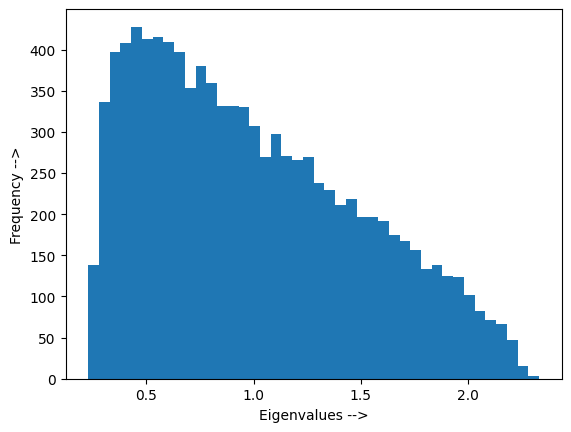

In [83]:
import matplotlib.pyplot as plt 
binwidth = 0.05
plt.hist(x1, bins=np.arange(min(x1), max(x1) + binwidth, binwidth))
plt.xlabel("Eigenvalues -->")
plt.ylabel("Frequency -->")

In [84]:
d2 = generate_vals(200,100)

In [85]:
x2 = np.ndarray.flatten(np.array(d2))

Text(0, 0.5, 'Frequency -->')

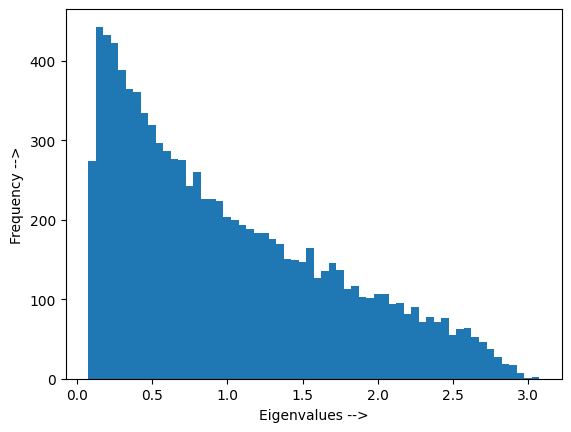

In [86]:
import matplotlib.pyplot as plt 
binwidth = 0.05
plt.hist(x2, bins=np.arange(min(x2), max(x2) + binwidth, binwidth))
plt.xlabel("Eigenvalues -->")
plt.ylabel("Frequency -->")

In [87]:
d3 = generate_vals(100,100)

In [88]:
x3 = np.ndarray.flatten(np.array(d3))

Text(0, 0.5, 'Frequency -->')

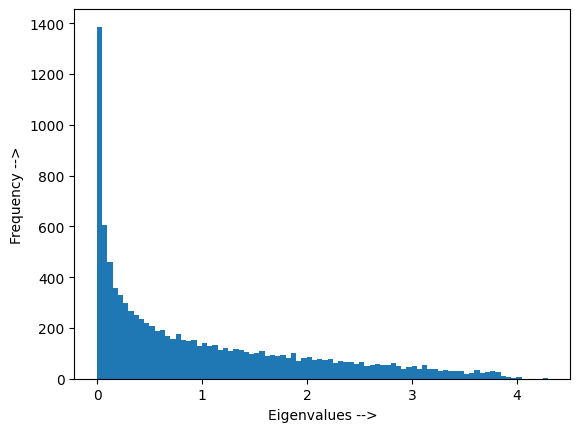

In [89]:
import matplotlib.pyplot as plt 
binwidth = 0.05
plt.hist(x3, bins=np.arange(min(x3), max(x3) + binwidth, binwidth))
plt.xlabel("Eigenvalues -->")
plt.ylabel("Frequency -->")

### We observe that most of the eigenvalues for lower dimensions of X have a value close to 0. As we increase 'n', the eigenvalues drift away from 0.